In [0]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import glob
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab Notebooks/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


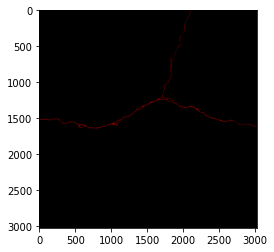

In [3]:
crack = []
files = glob.glob("./data/label/*.png")
for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        data = np.asarray(image)
        crack.append(data)
crack = np.array(crack)
crack = crack.astype('float32')
crack = crack / 255.0
plt.imshow(crack[1])

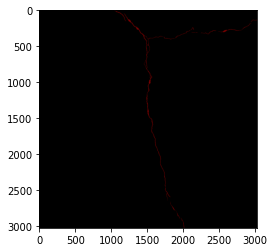

In [5]:
plt.imshow(crack[0])

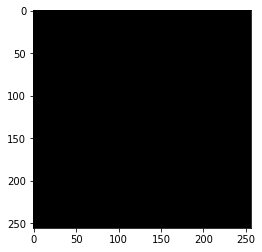

In [6]:
size = 256
count = 0
for cracks in crack:
  img = cracks
  v_size = img.shape[0] // size * size
  h_size = img.shape[1] // size * size 
  img = img[:v_size, :h_size]
  v_split = img.shape[0] // size
  h_split = img.shape[1] // size
  out_imgs = []
  k = 0
  for h_img in np.vsplit(img, v_split):
     for v_img in np.hsplit(h_img, h_split):
        out_imgs.append(v_img)
  out_imgs = np.array(out_imgs)
  #画像の保存
  out_imgs = out_imgs * 255
  for i, out_img in enumerate(out_imgs):
    cv2.imwrite('./split/annotations_prepped_train/crack{}_{}.png'.format(count,i),out_img)
  out_imgs = out_imgs / 255.0
  count += 1
show_img = cv2.cvtColor(out_imgs[3], cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)
